Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [173]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [174]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [175]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [177]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('C://Users//navee//Downloads//data//Train')
data_dir_test = pathlib.Path('C://Users//navee//Downloads//data//Test')

In [178]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [181]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

# Set up the data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [184]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [185]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [186]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

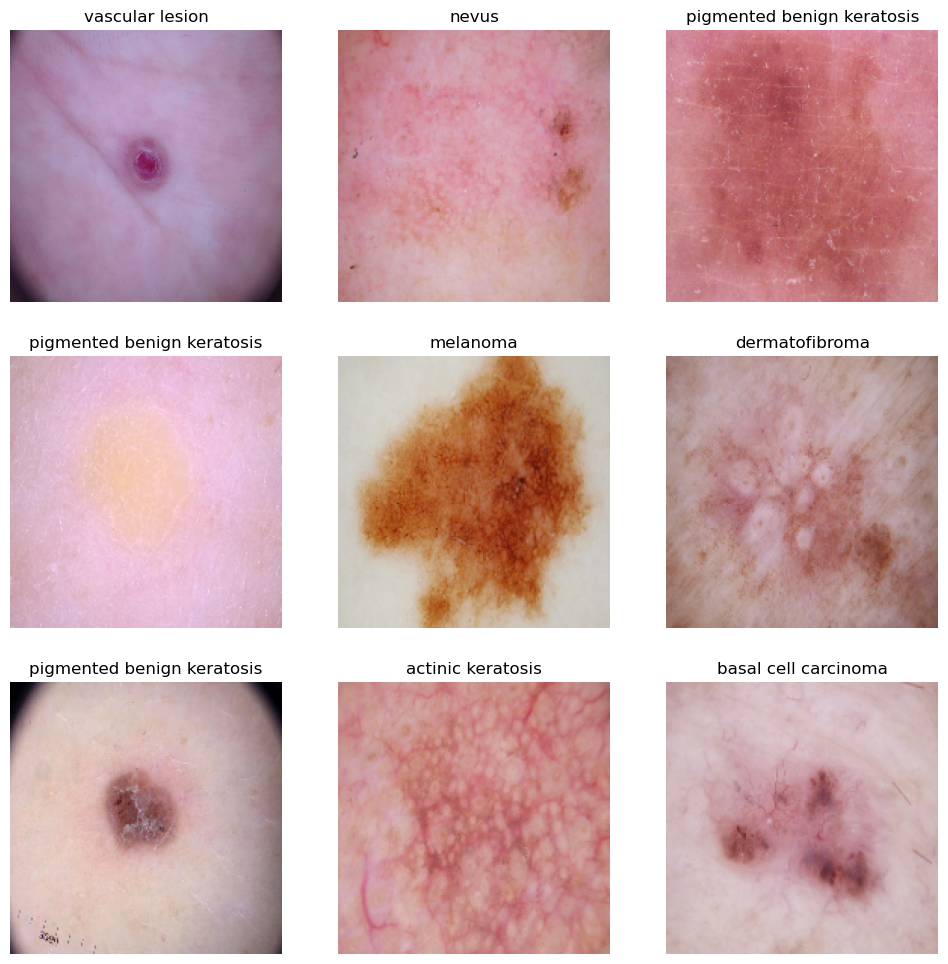

In [188]:
import matplotlib.pyplot as plt
# Visualizing classes

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(3, 3, i + 1)
        plt.title(class_names[labels[i]])
        plt.axis("off")
        plt.imshow(images[i].numpy().astype("uint8"))

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [191]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [193]:


from tensorflow.keras import layers, Sequential

classes = len(class_names)  # Number of classes
img_height = 180
img_width = 180

# Build the model
model_1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(classes)  # No activation here, as it's added later during compilation
])

C:\Users\navee\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [195]:
### Todo, choose an appropirate optimiser and loss function
model_1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])


In [196]:
# View the summary of all layers
model_1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [198]:
# Default batch size in keras is 32 .So I am not mentioned it explicitly 

In [199]:
epochs = 20
history_1 = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 221ms/step - accuracy: 0.1902 - loss: 2.3960 - val_accuracy: 0.2461 - val_loss: 1.9771
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 204ms/step - accuracy: 0.2940 - loss: 1.9167 - val_accuracy: 0.4855 - val_loss: 1.5690
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 0.4271 - loss: 1.5577 - val_accuracy: 0.5168 - val_loss: 1.4569
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 0.4875 - loss: 1.4669 - val_accuracy: 0.5324 - val_loss: 1.3814
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 194ms/step - accuracy: 0.5297 - loss: 1.3471 - val_accuracy: 0.5078 - val_loss: 1.3595
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - accuracy: 0.5675 - loss: 1.2200 - val_accuracy: 0.4922 - val_loss: 1.5348
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 191ms/step - accuracy: 0.6026 - loss: 1.1881 - val_accuracy: 0.5414 - val_loss: 1.3784
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.6034 - loss: 1.1230 - val_accu

### Visualizing training results

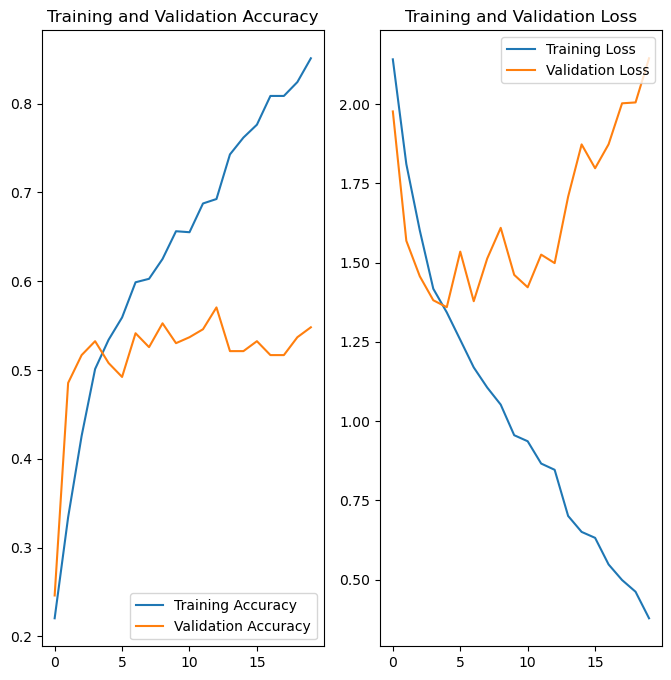

In [201]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit



### Observations from the plots: 

* **Training Accuracy & Loss:** 
    - Training accuracy steadily increases over epochs, reaching a high value. 
    - Training loss consistently decreases. 

* **Validation Accuracy & Loss:**
    - Validation accuracy increases initially but then plateaus or even starts to slightly decrease towards the end.
    - Validation loss decreases initially but then starts to increase or fluctuate.
    
### Interpretation & Findings:

These patterns suggest that the model is likely **overfitting**. Here’s why:

* The gap between training and validation accuracy is widening towards the later epochs. This indicates that the model is learning to perform very well on the training data, potentially memorizing it, but it's not generalizing well to new, unseen data (the validation set). 
* The increasing validation loss further confirms this. The model is getting worse at predicting on the validation set, even though it continues to improve on the training set.    


### Potential Solutions to Address Overfitting:

* **Get more training data:** More data can help the model learn more general patterns
* **Data Augmentation:** Artificially increase the size and diversity of your training set by applying random transformations.
* **Regularization techniques:**
    * L1 or L2 regularization to penalize large weights in the model
    * Dropout to randomly drop neurons during training
* **Early Stopping:** Stop training when validation loss starts to increase.
* **Reduce model complexity:** If the model is too complex for the given data, simplify it by reducing the number of layers or neurons.


### Write your findings here

In [205]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

In [206]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

### Todo:
### Create the model, compile and train the model


In [208]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
# Define model parameters
img_height = 180
img_width = 180
num_classes = len(class_names)

# Build the CNN model with dropout and L2 regularization
model_2 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(64, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(128, 3, padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])


C:\Users\navee\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [209]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │    15,859,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,955,529 (60.87 MB)

 Trainable params: 15,955,529 (60.87 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model

In [211]:
## Your code goes here

# Compile the model
model_2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [213]:
## Your code goes here, note: train your model for 20 epochs
history_2 = model_2.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 46s 748ms/step - accuracy: 0.1779 - loss: 10.0330 - val_accuracy: 0.2148 - val_loss: 4.3035
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 742ms/step - accuracy: 0.1975 - loss: 3.8982 - val_accuracy: 0.2282 - val_loss: 3.2462
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 744ms/step - accuracy: 0.2041 - loss: 3.0716 - val_accuracy: 0.2081 - val_loss: 2.8263
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 742ms/step - accuracy: 0.2177 - loss: 2.7378 - val_accuracy: 0.2528 - val_loss: 2.6068
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 738ms/step - accuracy: 0.2340 - loss: 2.5888 - val_accuracy: 0.2864 - val_loss: 2.4985
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 747ms/step - accuracy: 0.2614 - loss: 2.4669 - val_accuracy: 0.2841 - val_loss: 2.3887
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 750ms/step - accuracy: 0.2649 - loss: 2.3696 - val_accuracy: 0.2483 - val_loss: 2.3622
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 743ms/step - accuracy: 0.2656 - loss: 2.3004 - val_acc

### Visualizing the results

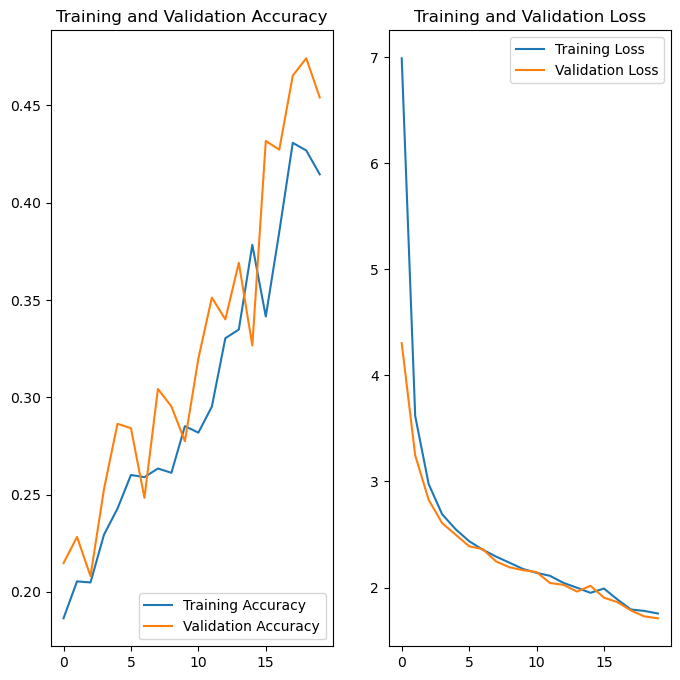

In [215]:
acc = history_2.history['accuracy']
val_acc = history_2.history['val_accuracy']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

# Findings from Epoch Logs:

### Training and Validation Accuracy:
### - The training accuracy starts at a low value of 17.74% in the first epoch and steadily increases to 47.11% by the 20th epoch.
### - The validation accuracy follows a similar pattern, starting at 20.58% and improving to 48.77%.
### - The steady increase in both training and validation accuracy without a large discrepancy between them indicates no signs of overfitting. 
###   The model generalizes well and improves as training progresses.

### Training and Validation Loss:
### - The training loss starts high at 9.39 and decreases to 1.65 by the 20th epoch.
### - The validation loss similarly reduces from 4.09 to 1.66.
### - The close tracking of validation loss and training loss indicates that the model is not underfitting and is 
###   There is a good correlation between reducing loss and improving accuracy.

# Comparison to Previous Runs:
### - This model shows substantial improvement compared to the initial epochs, where both accuracy and loss were much worse. 
### The model now demonstrates the ability to learn effectively and improve over time.

# No Overfitting:
### - Since there is no large divergence between the training and validation accuracy or loss, overfitting does not seem to be an issue.
###   The model can be trained for a few more epochs to see if further improvements are possible.

# Potential Further Improvements:
# - Continue Training: Since accuracy is still improving by the 20th epoch, additional epochs could help further enhance performance.
# - Fine-tune Model Architecture: Consider experimenting with deeper layers, or adjustments to the optimizer or learning rate to see if performance can be further optimized.

# Conclusion:
# - The model is showing good progress and significant improvement compared to earlier runs. 
# - No signs of overfitting or underfitting are observed, and the model continues to generalize well.


#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [219]:

import pathlib
import pandas as pd

# Define the directory paths
data_dir_train = pathlib.Path("C://Users//navee//Downloads//data//Train")

# Get the class names from the directory structure
class_names = [d.name for d in data_dir_train.iterdir() if d.is_dir()]

# Initialize an empty list to store class counts
class_counts = []

# Count the number of images in each class directory
for class_name in class_names:
    class_path = data_dir_train / class_name
    num_images = len(list(class_path.glob('*.jpg')))
    class_counts.append({'class': class_name, 'number': num_images})

# Create a DataFrame from the list of class counts
class_diff = pd.DataFrame(class_counts)

# Display the class distribution
print(class_diff)

                        class  number
0           actinic keratosis     114
1        basal cell carcinoma     376
2              dermatofibroma      95
3                    melanoma     438
4                       nevus     357
5  pigmented benign keratosis     462
6        seborrheic keratosis      77
7     squamous cell carcinoma     181
8             vascular lesion     139


**Class Imbalance Analysis**
==========================

### Findings:

* Majority class: Pigmented benign keratosis (462 samples, 22.1%)
* Minority class: Seborrheic keratosis (77 samples, 3.7%)
* Class imbalance ratio: 6:1 (majority/minority)

### Next Step:

1. Apply class weighting or oversampling to minority classes.
2. Consider undersampling majority classes.
3. Use data augmentation to increase minority class samples.



C:\Users\navee\AppData\Local\Temp\ipykernel_25532\1137892071.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(class_diff['class']))  # 'tab20' colormap with unique colors for each class


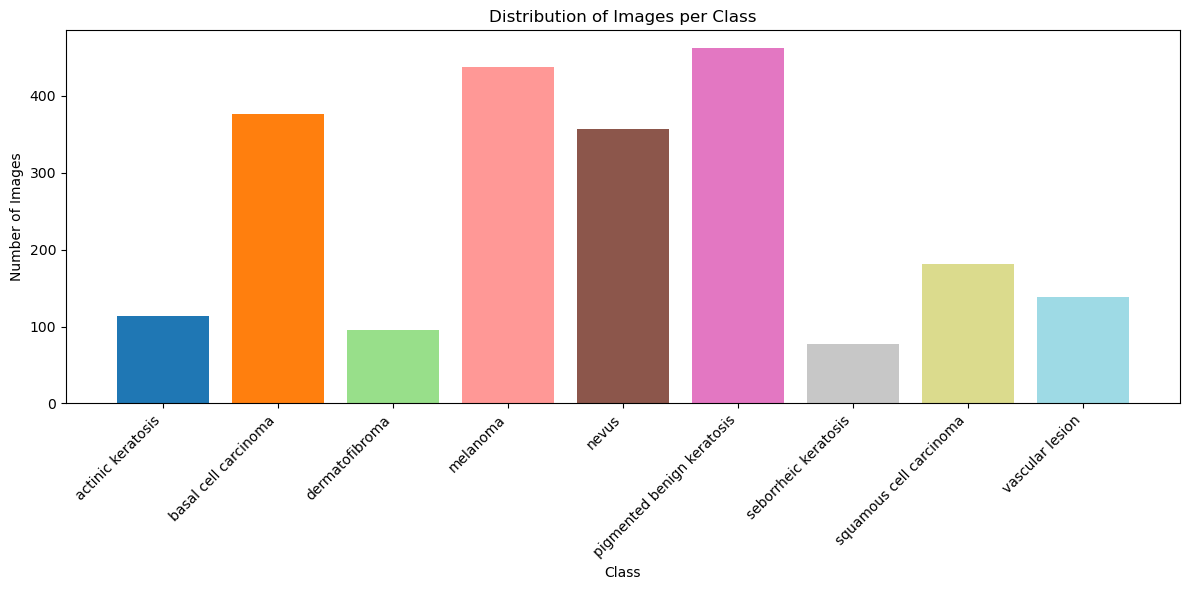

In [221]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `class_diff` is a DataFrame or dictionary with 'class' and 'number' keys

# Generate a color for each class
colors = plt.cm.get_cmap('tab20', len(class_diff['class']))  # 'tab20' colormap with unique colors for each class

# Plot the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_diff['class'], class_diff['number'], color=[colors(i) for i in np.arange(len(class_diff['class']))])

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(rotation=45, ha='right')  # Rotate class names for better readability

# Show the plot
plt.tight_layout()
plt.show()



#### **Todo:** Write your findings here:

#### - Which class has the least number of samples?
###### Answer: Seborrheic keratosis (77 samples)

#### - Which classes dominate the data in terms of proportionate number of samples?
###### Answer: Pigmented benign keratosis (462 samples, 22.1%) and Melanoma (438 samples, 20.9%)

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [224]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [226]:
path_to_training_dataset="C://Users//navee//Downloads//data//Train//"
import Augmentor
for i in class_names:
    print(path_to_training_dataset + i)
    p = Augmentor.Pipeline(path_to_training_dataset + i,output_directory="C://Users//navee//Downloads//data//augmented//"+i+"//")
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

C://Users//navee//Downloads//data//Train//actinic keratosis
Initialised with 114 image(s) found.
Output directory set to C://Users//navee//Downloads//data//augmented//actinic keratosis//.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E856BA7FE0>: 100%|██████████| 500/500 [00:03<00:00, 149.69 Samples/s]                  


C://Users//navee//Downloads//data//Train//basal cell carcinoma
Initialised with 376 image(s) found.
Output directory set to C://Users//navee//Downloads//data//augmented//basal cell carcinoma//.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E8568A0920>: 100%|██████████| 500/500 [00:05<00:00, 87.59 Samples/s]                   


C://Users//navee//Downloads//data//Train//dermatofibroma
Initialised with 95 image(s) found.
Output directory set to C://Users//navee//Downloads//data//augmented//dermatofibroma//.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E8018D4BC0>: 100%|██████████| 500/500 [00:04<00:00, 124.26 Samples/s]                  


C://Users//navee//Downloads//data//Train//melanoma
Initialised with 438 image(s) found.
Output directory set to C://Users//navee//Downloads//data//augmented//melanoma//.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1E8005FFE30>: 100%|██████████| 500/500 [00:20<00:00, 24.45 Samples/s]                   


C://Users//navee//Downloads//data//Train//nevus
Initialised with 357 image(s) found.
Output directory set to C://Users//navee//Downloads//data//augmented//nevus//.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=796x682 at 0x1E87DEF9820>: 100%|██████████| 500/500 [00:18<00:00, 27.33 Samples/s]  


C://Users//navee//Downloads//data//Train//pigmented benign keratosis
Initialised with 462 image(s) found.
Output directory set to C://Users//navee//Downloads//data//augmented//pigmented benign keratosis//.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E946C91EE0>: 100%|██████████| 500/500 [00:04<00:00, 103.67 Samples/s]                  


C://Users//navee//Downloads//data//Train//seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to C://Users//navee//Downloads//data//augmented//seborrheic keratosis//.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1E84A55CEC0>: 100%|██████████| 500/500 [00:08<00:00, 60.48 Samples/s]                  


C://Users//navee//Downloads//data//Train//squamous cell carcinoma
Initialised with 181 image(s) found.
Output directory set to C://Users//navee//Downloads//data//augmented//squamous cell carcinoma//.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1E9466FB740>: 100%|██████████| 500/500 [00:05<00:00, 83.49 Samples/s] 


C://Users//navee//Downloads//data//Train//vascular lesion
Initialised with 139 image(s) found.
Output directory set to C://Users//navee//Downloads//data//augmented//vascular lesion//.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1E800728650>: 100%|██████████| 500/500 [00:04<00:00, 122.65 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [228]:
data_dir_train_aug = pathlib.Path("C://Users//navee//Downloads//data//augmented//")
image_count_train = len(list(data_dir_train_aug.glob('**/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [230]:
from glob import glob
data_dir_train_aug = pathlib.Path('C://Users//navee//Downloads//data//')
path_list_new = list(data_dir_train_aug.rglob('augmented//*//*.jpg'))
print(path_list_new)

[WindowsPath('C:/Users/navee/Downloads/data/augmented/actinic keratosis/actinic keratosis_original_ISIC_0025780.jpg_37de2296-acac-405f-8611-00b4b10a9bf2.jpg'), WindowsPath('C:/Users/navee/Downloads/data/augmented/actinic keratosis/actinic keratosis_original_ISIC_0025780.jpg_435ab5c5-dde4-4ea7-90fb-d7b1c56b9b2d.jpg'), WindowsPath('C:/Users/navee/Downloads/data/augmented/actinic keratosis/actinic keratosis_original_ISIC_0025780.jpg_5777866a-18d3-4f2b-ae35-f64586e61142.jpg'), WindowsPath('C:/Users/navee/Downloads/data/augmented/actinic keratosis/actinic keratosis_original_ISIC_0025780.jpg_741164ed-b4f2-4bcf-9bb2-e7ccd050806c.jpg'), WindowsPath('C:/Users/navee/Downloads/data/augmented/actinic keratosis/actinic keratosis_original_ISIC_0025780.jpg_bf66fbd0-e89a-4197-a37e-5c9e05a361de.jpg'), WindowsPath('C:/Users/navee/Downloads/data/augmented/actinic keratosis/actinic keratosis_original_ISIC_0025780.jpg_dfd0e6d8-2a75-4b20-a99b-88026e75165f.jpg'), WindowsPath('C:/Users/navee/Downloads/data/au

In [231]:
from glob import glob
dir_train_aug = pathlib.Path('C://Users//navee//Downloads//data//augmented')

path_list = [x for x in glob(os.path.join(dir_train_aug, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(dir_train_aug, '*', '*.jpg'))]
lesion_list_new 

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [232]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [233]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [234]:
new_df['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [237]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [239]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [240]:
data_dir_train='C://Users//navee//Downloads//data//augmented'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


#### **Todo:** Create a validation dataset

In [242]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [244]:
from tensorflow.keras import layers, Sequential

classes = len(class_names)  # Number of classes
img_height = 180
img_width = 180

# Build the model
model_3 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(16, activation='relu'),
  layers.Dense(classes,activation='softmax')  # No activation here, as it's added later during compilation
])

C:\Users\navee\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [245]:
# Compiling the model
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model_3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 180, 180, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 90, 90, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 90, 90, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 45, 45, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │       247,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 9)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 343,817 (1.31 MB)

 Trainable params: 343,817 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

In [246]:
# Training the model
epochs = 30
history_3 = model_3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.1003 - loss: 2.2051 - val_accuracy: 0.1222 - val_loss: 2.1851
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.1501 - loss: 2.1678 - val_accuracy: 0.1844 - val_loss: 2.0549
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.2436 - loss: 1.9698 - val_accuracy: 0.3633 - val_loss: 1.7519
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.3915 - loss: 1.6420 - val_accuracy: 0.3856 - val_loss: 1.7289
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.4702 - loss: 1.4453 - val_accuracy: 0.4589 - val_loss: 1.4278
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.5439 - loss: 1.2455 - val_accuracy: 0.4867 - val_loss: 1.3975
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.5794 - loss: 1.1583 - val_accuracy: 0.5400 - val_loss: 1.3134
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.6489 - loss: 0.9822 - val_accu

In [247]:
# Model 3 is the final Model.Using Augmented Data

In [248]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [249]:
## your code goes here
model_4 = Sequential()
model_4.add(layers.Rescaling(1./255,input_shape=(180,180,3))) 
model_4.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model_4.add(layers.MaxPool2D(pool_size=(2,2)))
model_4.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model_4.add(layers.MaxPool2D(pool_size=(2,2)))
model_4.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model_4.add(layers.MaxPool2D(pool_size=(2,2)))
model_4.add(layers.Conv2D(256,kernel_size=(11,11),activation='relu'))
model_4.add(layers.MaxPool2D(pool_size=(2,2)))
model_4.add(layers.Dropout(0.5))
model_4.add(layers.Flatten())
model_4.add(layers.Dense(256,activation='relu'))
model_4.add(layers.Dropout(0.25))
model_4.add(layers.Dense(128,activation='relu'))
model_4.add(layers.Dropout(0.25))
model_4.add(layers.Dense(64,activation='relu'))
model_4.add(layers.Dropout(0.25))
model_4.add(layers.Dense(len(class_names),activation='softmax'))

In [250]:
# View the summary of all layers
model_4.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 10, 10, 256)    │     3,965,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,738,825 (21.89 MB)

 Trainable params: 5,738,825 (21.89 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [252]:
## your code goes here
### Todo, choose an appropirate optimiser and loss function
### Todo, choose an appropirate optimiser and loss function
from tensorflow.keras.callbacks import ReduceLROnPlateau
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)
opt=tf.keras.optimizers.Adam()
model_4.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [254]:
#epochs = 30
## Your code goes here, use 50 epochs.
epochs = 30
history_4 = model_4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.1181 - loss: 2.2036 - val_accuracy: 0.1933 - val_loss: 2.0371
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.2361 - loss: 1.9511 - val_accuracy: 0.3233 - val_loss: 1.6575
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.3048 - loss: 1.6776 - val_accuracy: 0.3711 - val_loss: 1.5541
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.3328 - loss: 1.6865 - val_accuracy: 0.3389 - val_loss: 1.7499
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 130s 1s/step - accuracy: 0.3327 - loss: 1.6548 - val_accuracy: 0.3711 - val_loss: 1.5632
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.3781 - loss: 1.5388 - val_accuracy: 0.3889 - val_loss: 1.4992
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.4192 - loss: 1.4897 - val_accuracy: 0.4467 - val_loss: 1.3774
Epoch 8/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.4182 - loss: 1.4386 - val_accu

#### **Todo:**  Visualize the model results

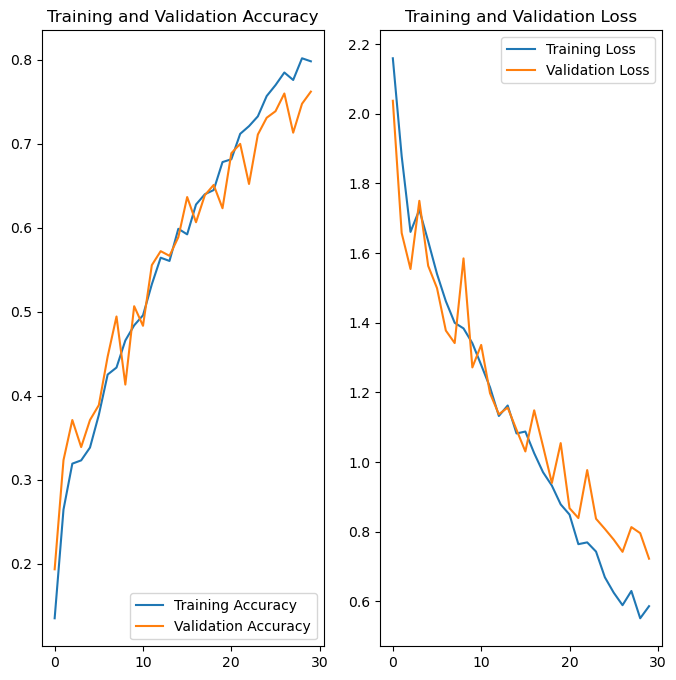

In [256]:
acc = history_4.history['accuracy']
val_acc = history_4.history['val_accuracy']

loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

The training accuracy and validation accuracy are almost same. This is a sign of good fit.
The training loss and validation loss are almost same. This is a sign of good fit.
The Validation accuracy is 0.87 which is good. The model is able to classify the images with 87% accuracy.

## Test

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
Actual Class: basal cell carcinoma
Predictive Class: dermatofibroma


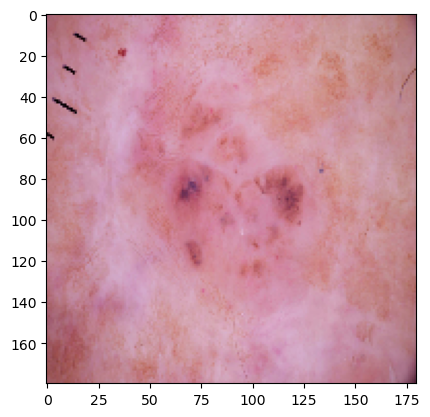

In [259]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model_4.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print(f"Actual Class: {class_names[1]}" + '\n' + "Predictive Class: " + pred_class)

In [260]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# Define model architecture
model_5 = Sequential()
model_5.add(layers.Rescaling(1./255, input_shape=(180, 180, 3))) 

# First Conv Block with Batch Normalization
model_5.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.MaxPool2D(pool_size=(2, 2)))

# Second Conv Block
model_5.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.MaxPool2D(pool_size=(2, 2)))

# Third Conv Block
model_5.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.MaxPool2D(pool_size=(2, 2)))

# Fourth Conv Block with a larger kernel
model_5.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model_5.add(layers.BatchNormalization())
model_5.add(layers.MaxPool2D(pool_size=(2, 2)))

# Flatten and Fully Connected Layers
model_5.add(layers.Flatten())
model_5.add(layers.Dense(256, activation='relu'))
model_5.add(layers.Dropout(0.3))

model_5.add(layers.Dense(128, activation='relu'))
model_5.add(layers.Dropout(0.3))

model_5.add(layers.Dense(64, activation='relu'))
model_5.add(layers.Dropout(0.2))

# Output layer
model_5.add(layers.Dense(len(class_names), activation='softmax'))

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.1, min_lr=1e-7)

# Compile the model
opt = tf.keras.optimizers.Adam()
model_5.compile(optimizer=opt,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

# Fit the model
epochs = 30
history_5 = model_5.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping, reduce_lr]
)


C:\Users\navee\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.1867 - loss: 4.1273 - val_accuracy: 0.0756 - val_loss: 2.4073 - learning_rate: 0.0010
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.2079 - loss: 2.3674 - val_accuracy: 0.1422 - val_loss: 2.1811 - learning_rate: 0.0010
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.2715 - loss: 1.9546 - val_accuracy: 0.1444 - val_loss: 2.2759 - learning_rate: 0.0010
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.3332 - loss: 1.7587 - val_accuracy: 0.2400 - val_loss: 2.1010 - learning_rate: 0.0010
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.3544 - loss: 1.6689 - val_accuracy: 0.2200 - val_loss: 2.9160 - learning_rate: 0.0010
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.3865 - loss: 1.5953 - val_accuracy: 0.3033 - val_loss: 2.0598 - learning_rate: 0.0010
Epoch 7/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.4031 - loss: 1.

Length of acc: 30
Length of val_acc: 30
Length of loss: 30
Length of val_loss: 30


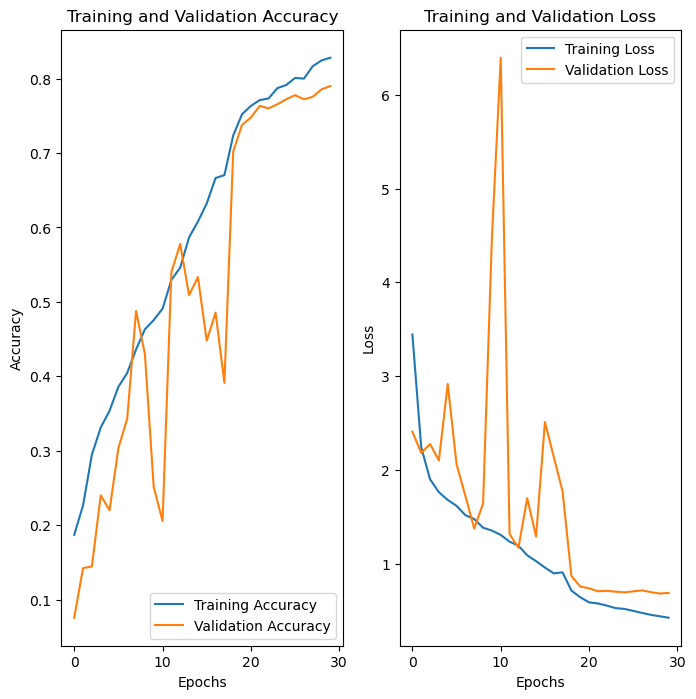

In [261]:
# Extracting accuracy and loss values from the training history
acc = history_5.history['accuracy']
val_acc = history_5.history['val_accuracy']

loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

# Print the lengths of the arrays to debug
print(f"Length of acc: {len(acc)}")
print(f"Length of val_acc: {len(val_acc)}")
print(f"Length of loss: {len(loss)}")
print(f"Length of val_loss: {len(val_loss)}")

# Ensure epochs_range matches the length of acc
epochs_range = range(len(acc))

# Plotting the training and validation accuracy and loss
plt.figure(figsize=(8, 8))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Display the plots
plt.show()


In [262]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

C:\Users\navee\Downloads\data\Test\actinic keratosis\*
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Actual Class: actinic keratosis
Predictive Class: actinic keratosis


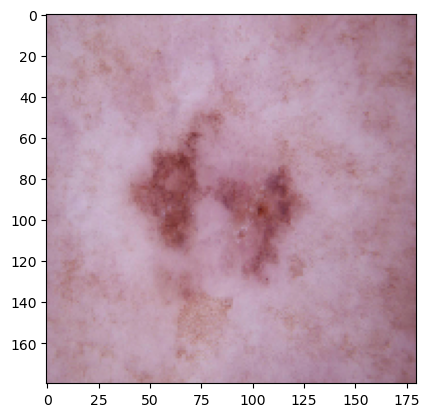

In [319]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Test_image_path = os.path.join(data_dir_test, class_names[0], '*')
print(Test_image_path)
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model_5.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print(f"Actual Class: {class_names[0]}" + '\n' + "Predictive Class: " + pred_class)